<a href="https://colab.research.google.com/github/Stavroskiig/celsius-to-kelvin-conversion-nn/blob/main/celsius_to_kelvin_conversion_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, import TensorFlow and NumPy.

In [20]:
import tensorflow as tf
import numpy as np

We will display only log messages with a severity of ERROR or higher (e.g., ERROR, CRITICAL).

In [21]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

We create two lists `celsius_q` and `kelvin_a` to train our model.

In [3]:
celsius_q = np.array([-30, -15, 0, 10, 18, 25, 40], dtype=float)
kelvin_a = np.array([243.15, 258.15, 273.15, 283.15, 291.15, 298.15, 313.15], dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Kelvin".format(c, kelvin_a[i]))

-30.0 degrees Celsius = 243.15 degrees Kelvin
-15.0 degrees Celsius = 258.15 degrees Kelvin
0.0 degrees Celsius = 273.15 degrees Kelvin
10.0 degrees Celsius = 283.15 degrees Kelvin
18.0 degrees Celsius = 291.15 degrees Kelvin
25.0 degrees Celsius = 298.15 degrees Kelvin
40.0 degrees Celsius = 313.15 degrees Kelvin


Build a dense network layer with 1 neuron and single value input.

In [4]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

Assemble into a model.

In [5]:
model = tf.keras.Sequential([l0])

We compile the model with loss and optimizer functions.

In [6]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

Now we train the model.

In [15]:
history = model.fit(celsius_q, kelvin_a, epochs=2500, verbose=False)
print("Finished training the model")

Finished training the model


Also, we can display training statistics. With trial and error we selected 2500 epochs.

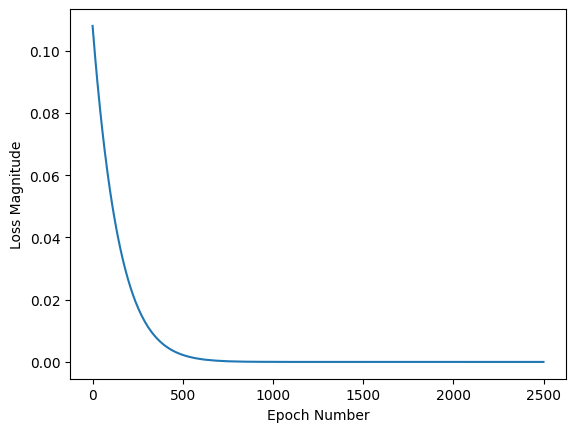

In [17]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

We can now predict a value, for example $100$.

In [18]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 97ms/step
[[373.15036]]


The correct answer is  $100 + 273.15 = 373.15$, so our model is good.

In [19]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.0000168]], dtype=float32), array([273.14868], dtype=float32)]


The first variable is close to ~1.0 and the second to ~273.15. These values (1.0 and 273.15) are the actual variables in the real conversion formula.

For a single neuron with a single input and a single output, the internal math looks the same as $y = mx + b$, which has the same form as the conversion equation, $f = 1.0c + 273.15$.